<a href="https://colab.research.google.com/github/psyifa/Most-Influential-User/blob/main/Analisis_Media_Sosial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identifikasi Komunitas Dalam Jaringan Twitter Dengan Kata Kunci “Debat Capres” Menggunakan Metode Louvain  
1. Muhammad Abrar Triyadi - 1305213046
2. Syifa Putri Fadhilla - 1305210084

Import library yang digunakan untuk melakukan analisis

- Pandas digunakan untuk melakukan import dataset
- Networkx digunakan untuk membuat graph, visualisasi graph, dan membuat komunitas
- Matplotlib digunakan untuk membuat visualisasi graph

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Mengimport dataset hasil crawling Twitter dengan kata kunci "Debat Capres" yang sudah di cleaning sebelumnya dan dipisahkan menjadi kolom "To" dan kolom "From"

In [ ]:
df_result = pd.read_excel("/content/DCresult.xlsx")
df_result

,To,From
0,Jackkhan1940,prabowo
1,voiceofpkb,aniesbaswedan
2,MardaniAliSera,aniesbaswedan
3,STresnowati1,aniesbaswedan
4,Metro_TV,NasDem
...,...,...
1849,aliengelap,sultanfrozen
1850,AndyTjondro,gibran_tweet
1851,ngeboss_senin,einelyb
1852,ngeboss_senin,Afutami


Melihat banyaknya aktor yang terlibat

In [ ]:
# Menghitung jumlah aktor unik untuk kolom 'From'
jumlah_aktor_from = df_result['From'].nunique()

# Menghitung jumlah aktor unik untuk kolom 'To'
jumlah_aktor_to = df_result['To'].nunique()

print(f"Jumlah aktor untuk 'From': {jumlah_aktor_from}")
print(f"Jumlah aktor untuk 'To': {jumlah_aktor_to}")

Jumlah aktor untuk 'From': 1046
Jumlah aktor untuk 'To': 924


# **Pembentukan Graph**

Membuat variabel G untuk menyimpan graph dengan library networkx

In [ ]:
#Membuat variabel untuk membentuk graph
G = nx.Graph()

Membuat graph dengan nodes dihasilkan dari kolom "To" dan edges dihasilkan dari kolom "From".

In [ ]:
#Membuat graph dengan nodes adalah kolom "To" dan edges adalah kolom "From"
G = nx.from_pandas_edgelist(df_result, source ="From", target = "To")

In [ ]:
#Melihat nodes yang terbentuk
print('Nodes in graph:')
G.nodes()

Nodes in graph:


NodeView(('prabowo', 'Jackkhan1940', 'aniesbaswedan', 'voiceofpkb', 'MardaniAliSera', 'STresnowati1', 'NasDem', 'Metro_TV', 'olvaholvah', 'Resty_J_Cayah', 'KPU_ID', 'INFOBNN', 'ganjarpranowo', 'jijindut', 'mohmahfudmd', 'Gojekmilitan', 'abu_waras', 'bawaslu_RI', 'psi_id', 'ch_chotimah2', 'marlina_idha', 'SyaifulHooda', 'DPP_PKB', 'berlianidris', 'Yulia_NS79', 'fadjroeL', 'PEDOMAN_id', 'Muhammad_Saewad', 'cakimiNOW', 'gibran_tweet', 'Akualamisendiri', 'Aryprasetyo85', 'akbarfaizal68', 'olink1978', 'jokowi', 'Bastarawijaya', 'ridwankamil', 'azissubekti', 'Gerindra', 'ignasbowo', 'genx36545403', 'Minietweets_', 'AndreasSolusi', 'putri_Aalona', 'kpu_id', 'Anak__Ogi', 'BangPino__', '_Rizmaya__', 'David_Wijaya03', 'narkosun', 'LANGKAHANIES', 'PKSejahtera', 'mikopeled', 'JoeTirtoDiputro', 'AzzamIzzulhaq', 'Greschinov', 'devy_casanofa', 'yaniarsim', 'Fahrihamzah', 'Radjahoki_pro', 'Humaira_balqiss', 'drpriono1', 'basuki_btp', 'NdrewsTjan', 'TeddGus', 'dhemit_is_back', 'PDemokrat', 'budimandjat

In [ ]:
#Melihat edges yang terbentuk
print("Edges in graph:")
G.edges()

Edges in graph:


EdgeView([('prabowo', 'Jackkhan1940'), ('prabowo', 'Resty_J_Cayah'), ('prabowo', 'Gojekmilitan'), ('prabowo', 'Muhammad_Saewad'), ('prabowo', 'azissubekti'), ('prabowo', 'Metro_TV'), ('prabowo', 'TeddGus'), ('prabowo', 'dhemit_is_back'), ('prabowo', 'AsikinAja2000'), ('prabowo', 'bumnbersatu'), ('prabowo', 'msaid_didu'), ('prabowo', 'JordanMihaf'), ('prabowo', 'Mvpivanaputra'), ('prabowo', 'xquitavee'), ('prabowo', 'PallakaGO'), ('prabowo', 'g_politik2024'), ('prabowo', 'TeguhTimurCom'), ('prabowo', 'wirosablengradz'), ('prabowo', 'MONDOSIO1687693'), ('prabowo', 'kotabahagia'), ('prabowo', 'ThE_ELm007'), ('prabowo', 'dikrizal'), ('prabowo', 'Ar_910'), ('prabowo', 'ghudrfg3456'), ('prabowo', 'NapiPKS'), ('prabowo', 'satria11092301'), ('Jackkhan1940', 'Gerindra'), ('aniesbaswedan', 'voiceofpkb'), ('aniesbaswedan', 'MardaniAliSera'), ('aniesbaswedan', 'STresnowati1'), ('aniesbaswedan', 'Metro_TV'), ('aniesbaswedan', 'marlina_idha'), ('aniesbaswedan', 'berlianidris'), ('aniesbaswedan', 'fa

In [ ]:
#Melihat jumlah nodes dan edges yang terbentuk
print("Banyaknya nodes dalam graph:",len(G.nodes()))
print("Banyaknya edges dalam graph:",len(G.edges()))

Banyaknya nodes dalam graph: 1944
Banyaknya edges dalam graph: 1636


Terlihat bahwa edges lebih banyak dikarenakan dalam jaringan sosial, terdapat beberapa orang yang hanya melakukan tweet tanpa berinteraksi dengan orang lain sehingga tidak terbentuk jaringan dengan yang lain.

# **Menganalisis Komunitas**

Menginstall library python-louvain sebagai metode pembentukan komunitas

In [ ]:
!pip install python-louvain

In [ ]:
import community.community_louvain as community_louvain

In [ ]:
# Hitung komunitas dengan metode Louvain
partition = community_louvain.best_partition(G)

# Hitung jumlah komunitas
num_communities = len(set(partition.values()))

print(f"Jumlah komunitas: {num_communities}")

Jumlah komunitas: 500


Jumlah komunitas yang terbentuk dari jaringan sosial Twitter dengan kata kunci "Debat Capres" adalah 500 komunitas.

In [ ]:
# Menghitung jumlah node dalam setiap komunitas
community_sizes = {k: len([i for i in partition.values() if i == k]) for k in set(partition.values())}

# Mengambil komunitas terbesar
largest_community = max(community_sizes, key=community_sizes.get)

# Menampilkan node dalam komunitas terbesar
nodes_in_largest_community = [node for node, community in partition.items() if community == largest_community]

# Menampilkan informasi komunitas terbesar
print(f"Komunitas Terbesar: {largest_community}")
print(f"Jumlah Node: {community_sizes[largest_community]}")
print(f"Node dalam Komunitas: {nodes_in_largest_community}")

Komunitas Terbesar: 12
Jumlah Node: 364
Node dalam Komunitas: ['SadieHerri43233', 'zuliaarzk', 'sadili_safiq', 'sintamand', 'SaniWaleederh', 'raihanaarr', 'sastroaryo', 'ginasfraa', 'Scooxxi', 'nadiaptii', 'Si_Alan69', 'ElNickyRinaldi', 'sigepras', 'radhityairfnd', 'Simanjunta39416', 'rizallfauzi', 'SmolHtao', 'ptritiaraa', 'seri_dini', 'Bulanzllla', 'seyikko', 'naufalgilangg', 'sisetiawan88', 'arifgnawan', 'spcmonn', 'NunungHallailah', 'shaqi_putra3', 'jusufkallaaa', 'ShoegameS', 'riismayantiiii', 'stalin_lenin11', 'vitrytikky', 'shopiafauziah', 'chinthabumi', 'PartaiSocmed', 'si_ciio', 'PartaiSocmed.', 'SaepulNanang', 'VeronikaDwww', 'milleeey_', 'aldafaziah', 'mimizone_', 'awalTahunn', 'milqtte', 'MimiAgustin8', 'aisyahhraahma', 'MightyyKtzy_', 'citradahliaa', 'saraisyaa', 'claracrsa', 'milkytofuu', 'Abizarbahii', 'saruhuy27', 'jesikalren', 'miikayoi', 'LanaAtalaa', 'sayaputri301', 'riskianwrr', 'miiho1', 'ekoopyoo', 'mrduatiga', 'hendrairawann0', 'markmyjihoon', 'rizkiderrenn', 'MI

Komunitas terbesar didapatkan oleh komunitas yang bernomor 12 dan memiliki jumlah node sebanyak 364.

In [ ]:
# Mengambil 3 komunitas terbesar
top_3_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)[:3]

# Menampilkan informasi 3 komunitas terbesar
for community in top_3_communities:
    print(f"Komunitas {community}:")
    print(f"  Jumlah Node: {community_sizes[community]}")
    print(f"  Derajat Rata-rata: {average_degree_per_community[community]:.2f}")
    print("\n")

Komunitas 12:
  Jumlah Node: 364
  Derajat Rata-rata: 2.17


Komunitas 0:
  Jumlah Node: 152
  Derajat Rata-rata: 2.92


Komunitas 10:
  Jumlah Node: 82
  Derajat Rata-rata: 2.16




Kami menampilkan 3 komunitas terbesar berdasarkan partisi dengan metode louvain.

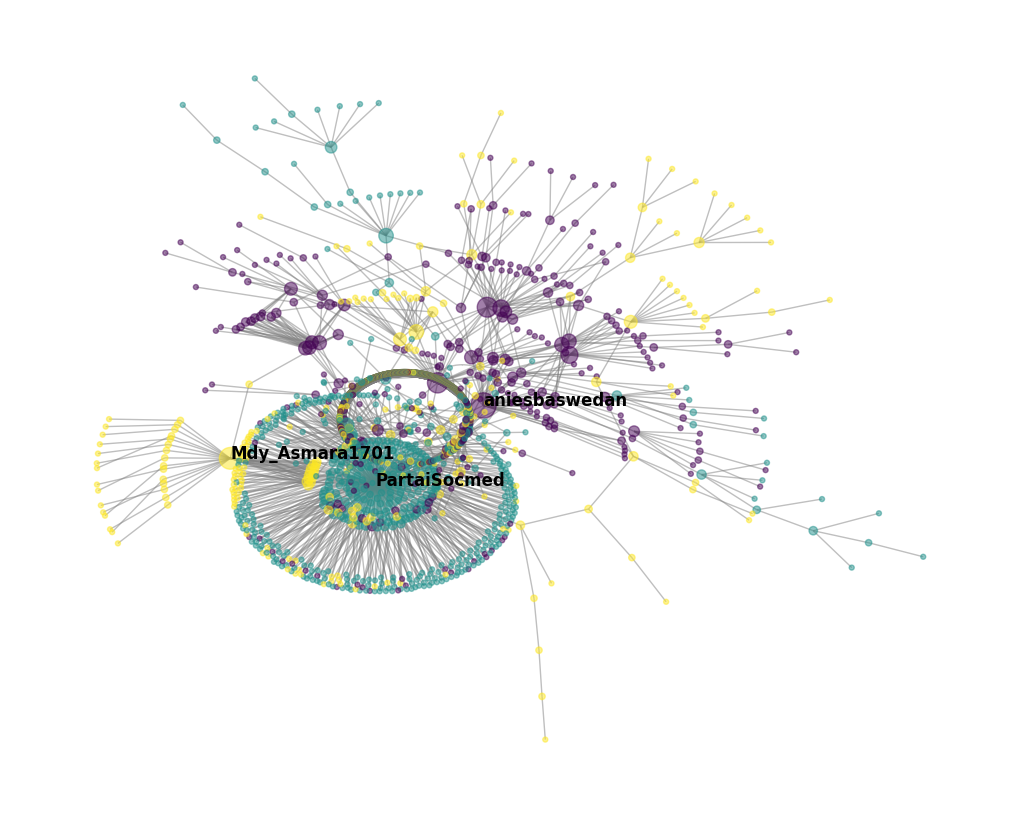

In [ ]:
# Membuat objek Graph dari NetworkX
G = nx.from_pandas_edgelist(df_result, source='From', target='To')

# Menggunakan algoritma Louvain untuk mendeteksi komunitas
partition = community_louvain.best_partition(G)

# Menambahkan informasi komunitas ke dalam graf
nx.set_node_attributes(G, partition, 'community')

# Menghitung jumlah node dalam setiap komunitas
community_sizes = {k: len([i for i in partition.values() if i == k]) for k in set(partition.values())}

# Mengambil 3 komunitas terbesar
top_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)[:3]

# Mengambil node dengan derajat tertinggi dari setiap komunitas
top_nodes = {community: max([(node, degree[node]) for node in G.nodes if partition[node] == community], key=lambda x: x[1])[0] for community in top_communities}

# Mengatur warna node berdasarkan komunitasnya
color_map = plt.cm.get_cmap('viridis', len(top_communities))
node_color = [color_map(partition[node] % len(top_communities)) for node in G.nodes()]

# Menghitung derajat setiap node dalam grafik
degree = dict(G.degree())

# Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
node_size = [(v * 8) + 5 for v in degree.values()]

# Membuat objek figure dengan ukuran canvas yang diinginkan
fig = plt.figure(figsize=(10, 8))

# Menggambar network graph dengan warna node berdasarkan komunitas
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma, edge_color='gray', font_size=7, alpha=0.5)

# Menambahkan label pada node derajat tertinggi di setiap komunitas
for community, node in top_nodes.items():
    x, y = pos[node]
    plt.text(x, y, node, fontsize=12, color='black', fontweight='bold')

plt.show()

Pada tahap visualisasi komunitas kami menampilkan 3 komunitas terbesar yang diurutkan berdasarkan metode louvain. Warna yang berbeda menunjukkan komunitas yang berbeda. Label node derajat tertinggi dalam setiap komunitas memberikan informasi tambahan mengenai node-node kunci yang memiliki peran sentral dalam komunitas tersebut. Terlihat bahwa akun dengan username "PartaiSocmed" masuk salah satu komunitas terbesar dan semua nodes-nya saling berdekatan dengan nodes komunitas lain, hal ini menunjukkan bahwa akun tersebut juga sering berinteraksi dengan akun yang masuk ke kategori komunitas lainnya. Lalu untuk akun "aniesbaswedan" memiliki kedekatan dengan komunitas lain seperti "Mdy_Asmara1701" hal ini dijelaskan dengan fakta bahwa "Mdy_Asmara1701" merupakan pendukung "aniesbaswedan" yang selalu melakukan aktivitas seperti mention dan juga like postingan capres Anies Baswedan.

In [ ]:
# Menghitung derajat rata-rata setiap komunitas
average_degree_per_community = {community: sum([degree[node] for node in G.nodes if partition[node] == community]) / community_sizes[community] for community in set(partition.values())}

# Menampilkan analisis ukuran setiap komunitas
for community in set(partition.values()):
    print(f"Komunitas {community}:")
    print(f"  Jumlah Node: {community_sizes[community]}")
    print(f"  Derajat Rata-rata: {average_degree_per_community[community]:.2f}")
    print("\n")

Komunitas 0:
  Jumlah Node: 152
  Derajat Rata-rata: 2.92


Komunitas 1:
  Jumlah Node: 30
  Derajat Rata-rata: 2.53


Komunitas 2:
  Jumlah Node: 35
  Derajat Rata-rata: 2.26


Komunitas 3:
  Jumlah Node: 29
  Derajat Rata-rata: 2.07


Komunitas 4:
  Jumlah Node: 35
  Derajat Rata-rata: 2.06


Komunitas 5:
  Jumlah Node: 36
  Derajat Rata-rata: 3.94


Komunitas 6:
  Jumlah Node: 4
  Derajat Rata-rata: 1.50


Komunitas 7:
  Jumlah Node: 2
  Derajat Rata-rata: 1.00


Komunitas 8:
  Jumlah Node: 2
  Derajat Rata-rata: 1.00


Komunitas 9:
  Jumlah Node: 5
  Derajat Rata-rata: 1.60


Komunitas 10:
  Jumlah Node: 82
  Derajat Rata-rata: 2.16


Komunitas 11:
  Jumlah Node: 2
  Derajat Rata-rata: 1.00


Komunitas 12:
  Jumlah Node: 364
  Derajat Rata-rata: 2.17


Komunitas 13:
  Jumlah Node: 3
  Derajat Rata-rata: 1.67


Komunitas 14:
  Jumlah Node: 4
  Derajat Rata-rata: 1.75


Komunitas 15:
  Jumlah Node: 4
  Derajat Rata-rata: 1.75


Komunitas 16:
  Jumlah Node: 4
  Derajat Rata-rata: 1.75

Kami menampilkan seluruh komunitas yang berjumlah 500 komunitas beserta jumlah nodes dan derajat rata-ratanya.

# **Melihat masing-masing komunitas yang sudah di pisahkan**

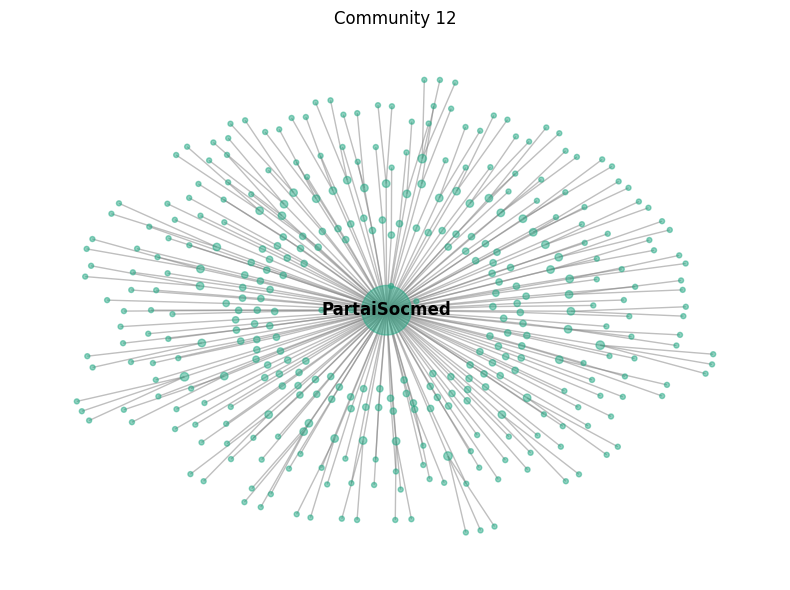

In [ ]:
# Fungsi untuk menggambar network graph suatu komunitas
def draw_community_graph(G, partition, community_id, ax):
    # Menyaring node yang termasuk dalam komunitas tertentu
    nodes_in_community = [node for node, cid in partition.items() if cid == community_id]

    # Membuat subgraf yang hanya terdiri dari node dalam komunitas tertentu
    subgraph_community = G.subgraph(nodes_in_community)

    # Menghitung derajat setiap node dalam subgraf
    degree_subgraph_community = dict(subgraph_community.degree())

    # Mengurutkan node berdasarkan derajatnya
    top_nodes_community = sorted(degree_subgraph_community, key=degree_subgraph_community.get, reverse=True)[:5]

    # Mengatur warna node berdasarkan derajatnya
    node_color_community = ['#22A884FF' for _ in subgraph_community.nodes()]

    # Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
    node_size_community = [(v * 8) + 5 for v in degree_subgraph_community.values()]

    # Menggambar network graph dengan warna node yang tetap dan ukuran berdasarkan derajat
    pos_community = nx.spring_layout(subgraph_community, k=0.1)
    nx.draw(subgraph_community, pos_community, with_labels=False, node_size=node_size_community,
            node_color=node_color_community, edge_color='gray', font_size=7, alpha=0.5, ax=ax)

    # Menambahkan label pada node paling berpengaruh dalam komunitas
    most_influential_node = max(top_nodes_community, key=degree_subgraph_community.get)
    ax.text(pos_community[most_influential_node][0], pos_community[most_influential_node][1], most_influential_node,
            fontsize=12, color='black', fontweight='bold', ha='center', va='center')

    ax.set_title(f'Community {community_id}')

# Menentukan ID komunitas yang ingin divisualisasikan
target_community_id = 12

# Membuat subplots untuk menampilkan komunitas yang diinginkan
fig, ax = plt.subplots(figsize=(8, 6))

# Menggambar network graph untuk komunitas yang diinginkan
draw_community_graph(G, partition, target_community_id, ax)

plt.tight_layout()
plt.show()

Pada tahap ini kami memecah 3 komunitas besar menjadi satu-satu, komunitas terbesar di urutan pertama ini adalah akun dengan username "PartaiSocmed", semenjak ramainya fase kampanye capres dan cawapres akun PartaiSocmed sering membuat tweet politik yang berhubungan dengan capres dan juga cawapres, maka dari itu bisa dilihat nodes dan edges yang terhubung-nya sangat banyak dikarenakan banyak pengguna lain yang melakukan interaksi dengan akun ini seperti melakukan mention, like postingan, share postingan, dan juga melakukan retweet terhadap tweet yang dibuat akun ini.

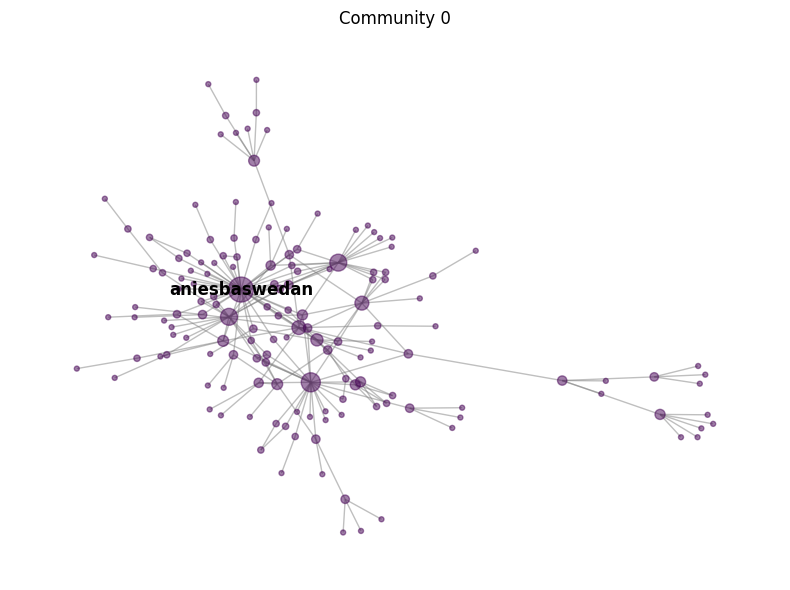

In [ ]:
# Fungsi untuk menggambar network graph suatu komunitas
def draw_community_graph(G, partition, community_id, ax):
    # Menyaring node yang termasuk dalam komunitas tertentu
    nodes_in_community = [node for node, cid in partition.items() if cid == community_id]

    # Membuat subgraf yang hanya terdiri dari node dalam komunitas tertentu
    subgraph_community = G.subgraph(nodes_in_community)

    # Menghitung derajat setiap node dalam subgraf
    degree_subgraph_community = dict(subgraph_community.degree())

    # Mengurutkan node berdasarkan derajatnya
    top_nodes_community = sorted(degree_subgraph_community, key=degree_subgraph_community.get, reverse=True)[:5]

    # Mengatur warna node berdasarkan derajatnya
    node_color_community = ['#440154FF' for _ in subgraph_community.nodes()]

    # Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
    node_size_community = [(v * 8) + 5 for v in degree_subgraph_community.values()]

    # Menggambar network graph dengan warna node yang tetap dan ukuran berdasarkan derajat
    pos_community = nx.spring_layout(subgraph_community, k=0.1)
    nx.draw(subgraph_community, pos_community, with_labels=False, node_size=node_size_community,
            node_color=node_color_community, edge_color='gray', font_size=7, alpha=0.5, ax=ax)

    # Menambahkan label pada node paling berpengaruh dalam komunitas
    most_influential_node = max(top_nodes_community, key=degree_subgraph_community.get)
    ax.text(pos_community[most_influential_node][0], pos_community[most_influential_node][1], most_influential_node,
            fontsize=12, color='black', fontweight='bold', ha='center', va='center')

    ax.set_title(f'Community {community_id}')

# Menentukan ID komunitas yang ingin divisualisasikan
target_community_id = 0

# Membuat subplots untuk menampilkan komunitas yang diinginkan
fig, ax = plt.subplots(figsize=(8, 6))

# Menggambar network graph untuk komunitas yang diinginkan
draw_community_graph(G, partition, target_community_id, ax)

plt.tight_layout()
plt.show()

Lalu di urutan kedua komunitas terbesar ada akun dengan username "aniesbaswedan", terlihat bahwa nodes yang terhubung berdekatan ini menandakan bahwa banyak terjadi interaksi dengan akun tersebut, berdasarkan debat capres 1 akun ini banyak diperbincangkan dalam Twitter sehingga ini sejalan dengan hasil visualisasi yang memperlihatkan kedekatan hubungan antar nodes.

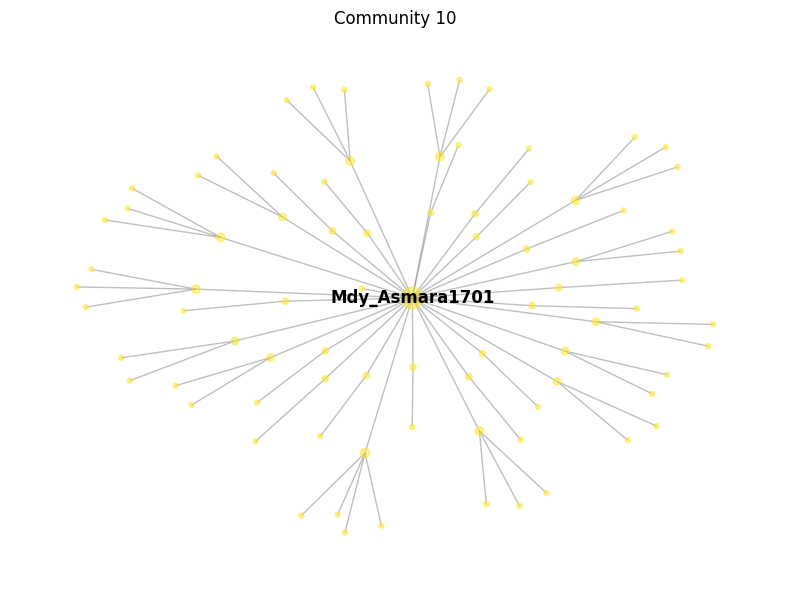

In [ ]:
# Fungsi untuk menggambar network graph suatu komunitas
def draw_community_graph(G, partition, community_id, ax):
    # Menyaring node yang termasuk dalam komunitas tertentu
    nodes_in_community = [node for node, cid in partition.items() if cid == community_id]

    # Membuat subgraf yang hanya terdiri dari node dalam komunitas tertentu
    subgraph_community = G.subgraph(nodes_in_community)

    # Menghitung derajat setiap node dalam subgraf
    degree_subgraph_community = dict(subgraph_community.degree())

    # Mengurutkan node berdasarkan derajatnya
    top_nodes_community = sorted(degree_subgraph_community, key=degree_subgraph_community.get, reverse=True)[:5]

    # Mengatur warna node berdasarkan derajatnya
    node_color_community = ['#FDE725FF' for _ in subgraph_community.nodes()]

    # Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
    node_size_community = [(v * 8) + 5 for v in degree_subgraph_community.values()]

    # Menggambar network graph dengan warna node yang tetap dan ukuran berdasarkan derajat
    pos_community = nx.spring_layout(subgraph_community, k=0.1)
    nx.draw(subgraph_community, pos_community, with_labels=False, node_size=node_size_community,
            node_color=node_color_community, edge_color='gray', font_size=7, alpha=0.5, ax=ax)

    # Menambahkan label pada node paling berpengaruh dalam komunitas
    most_influential_node = max(top_nodes_community, key=degree_subgraph_community.get)
    ax.text(pos_community[most_influential_node][0], pos_community[most_influential_node][1], most_influential_node,
            fontsize=12, color='black', fontweight='bold', ha='center', va='center')

    ax.set_title(f'Community {community_id}')

# Menentukan ID komunitas yang ingin divisualisasikan
target_community_id = 10

# Membuat subplots untuk menampilkan komunitas yang diinginkan
fig, ax = plt.subplots(figsize=(8, 6))

# Menggambar network graph untuk komunitas yang diinginkan
draw_community_graph(G, partition, target_community_id, ax)

plt.tight_layout()
plt.show()

Urutan ke tiga untuk komunitas terbesar di pegang oleh akun dengan username "Mdy_Asmara1701", akun ini dilihat dari postingan dan likes-nya merupakan salah satu pendukung capres Anies Baswedan, karena akun ini sering membuat tweet yang berhubungan dengan capres tersebut, akun ini bisa dikatakan buzzer karena hanya melakukan like, retwee, dan mem-posting tidak berinteraksi langsung dengan pengguna lain.

# **Kesimpulan**

Penelitian ini mengungkapkan bahwa penerapan metode deteksi komunitas dengan menggunakan algoritma Louvain sukses dalam memetakan kelompok-kelompok komunitas yang ada dalam jaringan tweet Twitter dengan kata kunci "Debat Caprse". Visualisasi hasil penelitian menunjukkan adanya interaksi yang signifikan antara masyarakat dan calon presiden, yang sejalan dengan preferensi masing-masing individu.

Analisis peta diskusi politik yang dihasilkan dari penelitian ini memberikan wawasan yang berharga terkait dinamika percakapan politik di platform media sosial, khususnya Twitter. Hasil visualisasi tidak hanya memperlihatkan adanya komunitas-komunitas yang terbentuk, tetapi juga mencerminkan bagaimana interaksi dan diskusi politik berlangsung di antara mereka.

Keberhasilan Louvain dalam mengidentifikasi dan memisahkan komunitas-komunitas ini menggambarkan efektivitas metode tersebut dalam menggali struktur yang tersembunyi dalam data sosial media. Kesimpulan ini dapat dijadikan acuan penting bagi analisis lebih lanjut terkait peta diskusi politik di media sosial, memberikan landasan untuk pemahaman lebih mendalam tentang pola perilaku dan interaksi masyarakat terkait isu politik tertentu, seperti "Debat Caprse".
